In [1]:
%matplotlibe inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

UsageError: Line magic function `%matplotlibe` not found.


In [12]:
import random

# bmi 계산, 리턴함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return '1'
    if bmi < 25: return '2'
    return '3'

# 쓰기전용 출력파일 준비
fp = open('c:/data/Data/bmi/bmi2.csv', 'w', encoding='utf-8')
fp.write('height,weight,label\r\n')

# 무작위 데이터 생성
cnt = {'1':0, '2':0, '3':0}
for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h,w)
    cnt[label] += 1
    fp.write('{0},{1},{2}\r\n'.format(h,w,label))

fp.close()
print('데이터가 생성되었습니다.', cnt)

데이터가 생성되었습니다. {'1': 6440, '2': 5933, '3': 7627}


In [13]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('c:/data/Data/bmi/bmi2.csv')
df.head()

,height,weight,label
0,187,53,1
1,140,55,3
2,181,59,1
3,142,57,3
4,188,46,1


In [14]:
train_cols = df.columns[0:2]
print(train_cols)

X = df[train_cols]
y = df['label']

print(df[train_cols].head())
print(y.head())

Index(['height', 'weight'], dtype='object')
   height  weight
0     187      53
1     140      55
2     181      59
3     142      57
4     188      46
0    1
1    3
2    1
3    3
4    1
Name: label, dtype: int64


In [15]:
df.columns

Index(['height', 'weight', 'label'], dtype='object')

In [16]:
df.shape

(20000, 3)

In [17]:
df.describe

<bound method NDFrame.describe of        height  weight  label
0         187      53      1
1         140      55      3
2         181      59      1
3         142      57      3
4         188      46      1
...       ...     ...    ...
19995     140      56      3
19996     127      70      3
19997     134      53      3
19998     130      60      3
19999     149      47      2

[20000 rows x 3 columns]>

In [18]:
#분류를 기준으로 한 평균값들
df.groupby('label').mean()

,height,weight
label,,
1,179.824845,47.440683
2,163.957020,58.372830
3,140.132555,65.063328


Text(0, 0.5, '빈도')

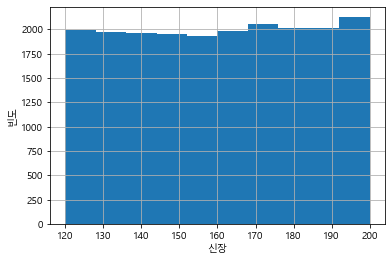

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

df['height'].hist()
plt.xlabel('신장')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

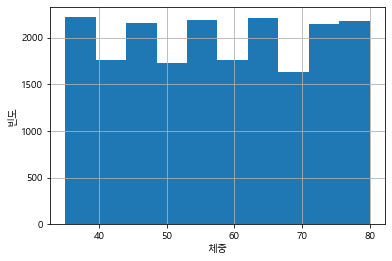

In [20]:
df['weight'].hist()
plt.xlabel('체중')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

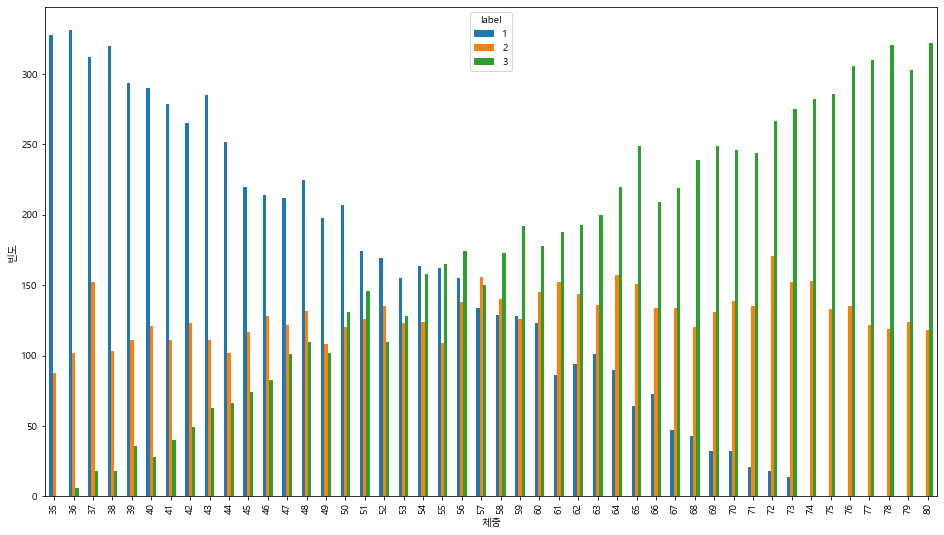

In [21]:
plt.rcParams['figure.figsize']=(16,9)
pd.crosstab(df['weight'], df.label).plot(kind='bar')
plt.xlabel('체중')
plt.ylabel('빈도')

In [22]:
df['label'].value_counts()

3    7627
1    6440
2    5933
Name: label, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: thin, 2: normal, 3: fat)')

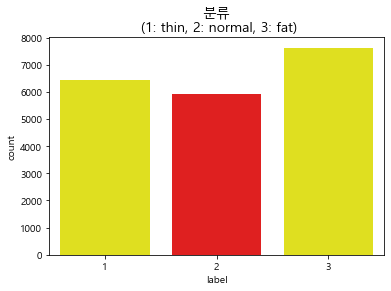

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

colors = ['yellow', 'red']
sns.countplot('label', data=df, palette=colors)
plt.title('분류\n (1: thin, 2: normal, 3: fat)', fontsize=14)

In [24]:
from sklearn.model_selection import train_test_split
# logistic regression

train_cols=['height', 'weight']

X = df[train_cols]
y = df['label']

print(type(X), type(y))
print(X.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
   height  weight
0     187      53
1     140      55
2     181      59
3     142      57
4     188      46
0    1
1    3
2    1
3    3
4    1
Name: label, dtype: int64


In [25]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['label'])
df2 = pd.concat([X_samp,y_samp], axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE

X_sample, y_sample=SMOTE(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample)